In [83]:
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, tan

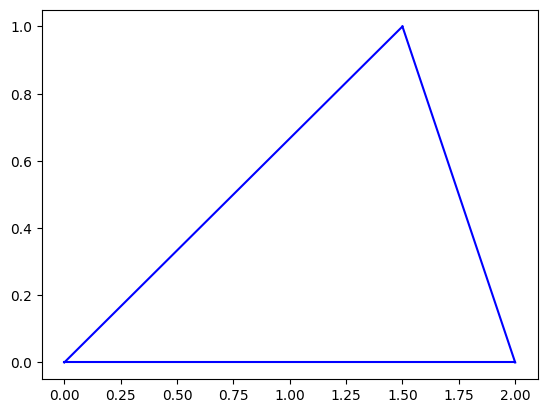

In [84]:
tri = [(0, 0), (2, 0), (1.5, 1.0)]


def plot_tri(tri, ax):
    t = tri + [tri[0]]
    for (x1, y1), (x2, y2) in zip(t[:-1], t[1:]):
        ax.plot((x1, x2), (y1, y2), color="b")


plot_tri(tri, plt.gca())

In [85]:
import numpy as np


def cotan(tri, i):
    tri = np.array(tri)
    v1 = tri[(i + 1) % 3] - tri[i]
    v2 = tri[(i - 1) % 3] - tri[i]
    stack = np.vstack((v1, v2))
    normed = (stack.T / np.linalg.norm(stack, axis=1)).T
    angle = np.arccos(normed[0] @ normed[1])
    print(np.cos(angle) / np.sin(angle))


cotan(tri, 0)

1.5000000000000002


In [86]:
import ipywidgets as widgets
from IPython.display import display

w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [87]:
# now, make an interactive widget, where you can move the points around on the triangle

import ipywidgets as widgets

output = widgets.Output()


def plot_tri_interactive(x0, y0, x1, y1, x2, y2, flip: bool):
    tri = [(x0, y0), (x1, y1), (x2, y2)]
    fig, ax = plt.subplots()
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.set_aspect("equal")
    t = tri + [tri[0]]
    if flip:
        t = t[::-1]
    for (x1, y1), (x2, y2) in zip(t[:-1], t[1:]):
        with output:
            ax.plot((x1, x2), (y1, y2), color="b")


def cotan_weights(tri):
    weights = []

    for ind in range(1, 3):
        tri = np.array(tri)
        v1 = tri[(ind + 1) % 3] - tri[ind]
        v2 = tri[(ind - 1) % 3] - tri[ind]
        stack = np.vstack((v1, v2))
        normed = (stack.T / np.linalg.norm(stack, axis=1)).T
        angle = np.arccos(normed[0] @ normed[1])
        weights.append(np.cos(angle) / np.sin(angle))

    return weights

10.688381906536154
3.6210224575328853


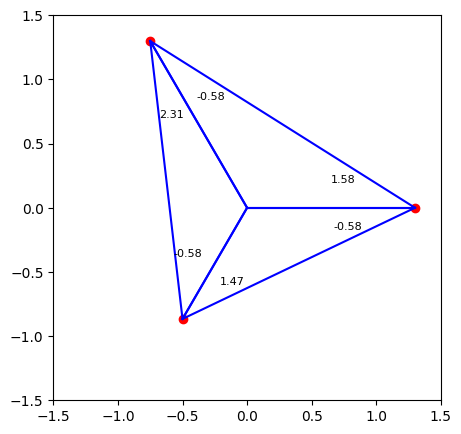

In [88]:
n_p = 3
points_on_sphere = np.random.uniform(0, 2 * np.pi, (n_p))
points_on_sphere = np.linspace(0, 2 * np.pi, n_p, endpoint=False)
# sort them
points_on_sphere.sort()
radii = np.array([1.3, 1.5, 1])
# convert to cartesian
points_on_sphere = (
    np.array([np.cos(points_on_sphere), np.sin(points_on_sphere)]).T * radii[:, None]
)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scaling = "equal"
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
for p in points_on_sphere:
    ax.plot(*p, "ro")


center = np.array([0, 0])
tris = [
    [center, points_on_sphere[i], points_on_sphere[(i + 1) % n_p]]
    for i in range(0, n_p)
]

total_weights1 = 0
total_weights2 = 0
for t in tris:
    plot_tri(t, ax)
    weights = cotan_weights(t)
    total_weights1 += sum(weights)
    weights = cotan_weights(t[::-1])
    total_weights2 += sum(weights)
    barycenter = np.mean(t, axis=0)
    for i, (x, y) in enumerate(t[1:]):
        (x, y) = barycenter + (np.array([x, y]) - barycenter) * 0.5
        ax.text(
            x,
            y,
            f"{weights[i]:.2f}",
            horizontalalignment="center",
            verticalalignment="center",
            fontsize=8,
        )

print(total_weights1)
print(total_weights2)

$(\Delta u)_i = \sum_j \left( \cot \alpha_j + \cot \beta_j \right) \left( u_j - u_i \right)$

$= - |j| \left( \cot \alpha_j + \cot \beta_j \right) u_i + \sum_j \left( (\cot \alpha_j + \cot \beta_j) u_j \right) $

$= - |j| \left( \cot \alpha_j + \cot \beta_j \right) u_i + \sum_j \left( (\cot \alpha_j + \cot \beta_j) u_j \right) $